In [53]:
import pandas as pd
import json 
import openpyxl
from sklearn.datasets import load_iris, load_boston
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

In [54]:
#Importamos el Dataset y creamos nueva columna partiendo de la columna'FT' que es el resultado del partido separando así cada partido en goles del local y del visitante

df_laliga_2013y14 = pd.read_csv('espana-master/2010s/2013-14/es.1.csv')
new = df_laliga_2013y14['FT'].str.split('-',n=1,expand=True)
df_laliga_2013y14['GolesLocal']=new[0]
df_laliga_2013y14['GolesVisitante']=new[1]
df_laliga_2013y14

,Round,Date,Team 1,FT,Team 2,GolesLocal,GolesVisitante
0,1,Sat Aug 17 2013,Real Sociedad,2-0,Getafe CF,2,0
1,1,Sat Aug 17 2013,Real Valladolid CF,1-2,Athletic Club Bilbao,1,2
2,1,Sat Aug 17 2013,Valencia CF,1-0,Málaga CF,1,0
3,1,Sun Aug 18 2013,Sevilla FC,1-3,Atlético Madrid,1,3
4,1,Sun Aug 18 2013,CA Osasuna,1-2,Granada CF,1,2
...,...,...,...,...,...,...,...
375,38,Sun May 18 2014,UD Almería,0-0,Athletic Club Bilbao,0,0
376,38,Sun May 18 2014,Real Valladolid CF,0-1,Granada CF,0,1
377,38,Sun May 18 2014,Rayo Vallecano,1-2,Getafe CF,1,2
378,38,Sun May 18 2014,Sevilla FC,3-1,Elche CF,3,1


In [55]:
#Convertimos en float los goles para poder trabajar con ellos y creamos columna goles totales por partido
df_laliga_2013y14['GolesLocal']=pd.to_numeric(df_laliga_2013y14['GolesLocal'], downcast="float")
df_laliga_2013y14['GolesVisitante']=pd.to_numeric(df_laliga_2013y14['GolesVisitante'], downcast="float")
#Esta columna se usará al final del EDA para comparar cada año de la Liga
df_laliga_2013y14['TotalGolesPartido'] = df_laliga_2013y14['GolesLocal']+df_laliga_2013y14['GolesVisitante']
df_laliga_2013y14

,Round,Date,Team 1,FT,Team 2,GolesLocal,GolesVisitante,TotalGolesPartido
0,1,Sat Aug 17 2013,Real Sociedad,2-0,Getafe CF,2.0,0.0,2.0
1,1,Sat Aug 17 2013,Real Valladolid CF,1-2,Athletic Club Bilbao,1.0,2.0,3.0
2,1,Sat Aug 17 2013,Valencia CF,1-0,Málaga CF,1.0,0.0,1.0
3,1,Sun Aug 18 2013,Sevilla FC,1-3,Atlético Madrid,1.0,3.0,4.0
4,1,Sun Aug 18 2013,CA Osasuna,1-2,Granada CF,1.0,2.0,3.0
...,...,...,...,...,...,...,...,...
375,38,Sun May 18 2014,UD Almería,0-0,Athletic Club Bilbao,0.0,0.0,0.0
376,38,Sun May 18 2014,Real Valladolid CF,0-1,Granada CF,0.0,1.0,1.0
377,38,Sun May 18 2014,Rayo Vallecano,1-2,Getafe CF,1.0,2.0,3.0
378,38,Sun May 18 2014,Sevilla FC,3-1,Elche CF,3.0,1.0,4.0


In [56]:
df_laliga_2013y14['TotalGolesPartido'].sum()

1045.0

In [105]:
AtletiL_1=df_laliga_2013y14.loc[df_laliga_2013y14['Team 1'] == 'Atlético Madrid', ['GolesLocal']]
AtletiL_1.reset_index(inplace=True)
AtletiL_1

,index,GolesLocal
0,18,5.0
1,31,4.0
2,50,2.0
3,77,2.0
4,98,5.0
5,118,2.0
6,131,7.0
7,158,3.0
8,164,3.0
9,182,0.0


In [106]:
AtletiL_1['GolesLocal'].sum()

49.0

In [107]:
AtletiV_1=df_laliga_2013y14.loc[df_laliga_2013y14['Team 2'] == 'Atlético Madrid', ['GolesVisitante']]
AtletiV_1.reset_index(inplace=True)
AtletiV_1

,index,GolesVisitante
0,3,3.0
1,29,2.0
2,44,2.0
3,64,1.0
4,83,0.0
5,106,2.0
6,128,1.0
7,143,2.0
8,170,1.0
9,207,4.0


In [108]:
AtletiV_1['GolesVisitante'].sum()

28.0

In [109]:
Atleti_Tot_1=pd.merge(AtletiL_1, AtletiV_1, left_index=True, right_index=True)
Atleti_Tot_1

,index_x,GolesLocal,index_y,GolesVisitante
0,18,5.0,3,3.0
1,31,4.0,29,2.0
2,50,2.0,44,2.0
3,77,2.0,64,1.0
4,98,5.0,83,0.0
5,118,2.0,106,2.0
6,131,7.0,128,1.0
7,158,3.0,143,2.0
8,164,3.0,170,1.0
9,182,0.0,207,4.0


In [110]:
Atleti_Tot_1['GolesLocal']=pd.to_numeric(Atleti_Tot_1['GolesLocal'], downcast="float")
Atleti_Tot_1['GolesVisitante']=pd.to_numeric(Atleti_Tot_1['GolesVisitante'], downcast="float")

In [111]:
Atleti_Tot_1['GolesTotales']=Atleti_Tot_1['GolesLocal']+Atleti_Tot_1['GolesVisitante']
Atleti_Tot_1

,index_x,GolesLocal,index_y,GolesVisitante,GolesTotales
0,18,5.0,3,3.0,8.0
1,31,4.0,29,2.0,6.0
2,50,2.0,44,2.0,4.0
3,77,2.0,64,1.0,3.0
4,98,5.0,83,0.0,5.0
5,118,2.0,106,2.0,4.0
6,131,7.0,128,1.0,8.0
7,158,3.0,143,2.0,5.0
8,164,3.0,170,1.0,4.0
9,182,0.0,207,4.0,4.0


In [112]:
Atleti_Tot_1['GolesTotales'].sum()

77.0

In [113]:
Atleti_Tot_1['GolesLocal'].sum()

49.0

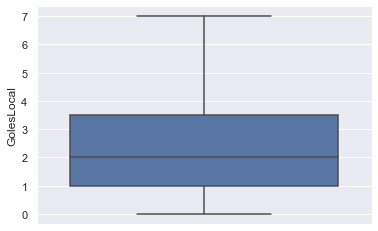

In [114]:
sns.boxplot(y=Atleti_Tot_1['GolesLocal'])
plt.show()

In [115]:
Atleti_Tot_1['GolesVisitante'].sum()

28.0

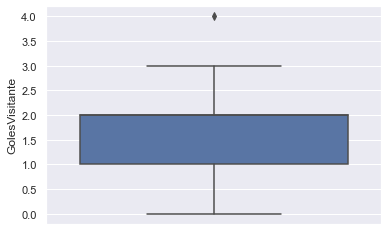

In [116]:
sns.boxplot(y=Atleti_Tot_1['GolesVisitante'])
plt.show()

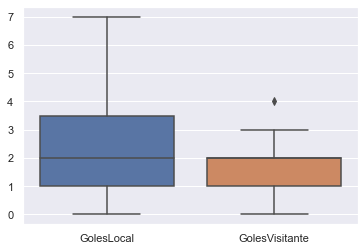

In [117]:
sns.boxplot(data=Atleti_Tot_1.loc[:, ['GolesLocal', 'GolesVisitante']])
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


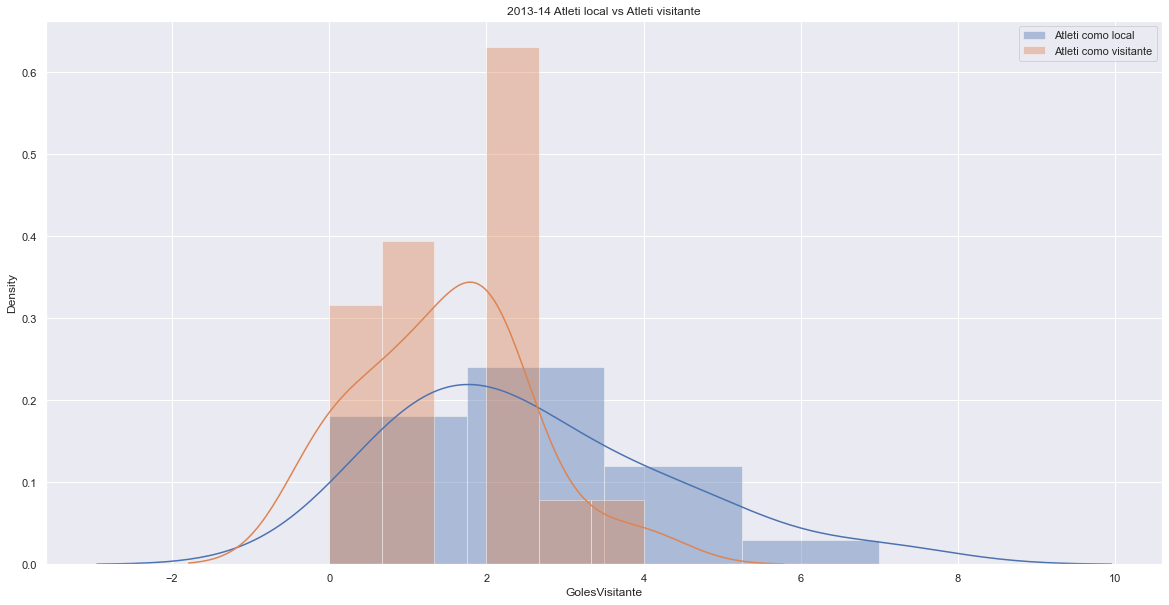

In [118]:
plt.figure(figsize = (20,10))
sns.distplot(Atleti_Tot_1['GolesLocal'], label='Atleti como local')
sns.distplot(Atleti_Tot_1['GolesVisitante'], label='Atleti como visitante')
plt.title("2013-14 Atleti local vs Atleti visitante")
plt.legend()

In [57]:
RealMadridL_2 = df_laliga_2013y14.loc[df_laliga_2013y14['Team 1'] == 'Real Madrid', ['GolesLocal']]
RealMadridL_2.reset_index(inplace=True)

RealMadridL_2

,index,GolesLocal
0,6,2.0
1,26,3.0
2,45,4.0
3,64,0.0
4,82,2.0
5,104,7.0
6,123,5.0
7,142,4.0
8,178,3.0
9,204,2.0


In [58]:
RealMadridL_2['GolesLocal'].sum()

63.0

In [59]:
RealMadridV_2 = df_laliga_2013y14.loc[df_laliga_2013y14['Team 2'] == 'Real Madrid', ['GolesVisitante']]
RealMadridV_2.reset_index(inplace=True)

RealMadridV_2


,index,GolesVisitante
0,19,1.0
1,30,2.0
2,56,2.0
3,72,3.0
4,93,1.0
5,114,3.0
6,132,5.0
7,153,2.0
8,166,3.0
9,185,1.0


In [60]:
Madrid_Tot_2=pd.merge(RealMadridL_2, RealMadridV_2, left_index=True, right_index=True)
Madrid_Tot_2

,index_x,GolesLocal,index_y,GolesVisitante
0,6,2.0,19,1.0
1,26,3.0,30,2.0
2,45,4.0,56,2.0
3,64,0.0,72,3.0
4,82,2.0,93,1.0
5,104,7.0,114,3.0
6,123,5.0,132,5.0
7,142,4.0,153,2.0
8,178,3.0,166,3.0
9,204,2.0,185,1.0


In [61]:
Madrid_Tot_2['GolesLocal']=pd.to_numeric(Madrid_Tot_2['GolesLocal'], downcast="float")
Madrid_Tot_2['GolesVisitante']=pd.to_numeric(Madrid_Tot_2['GolesVisitante'], downcast="float")

In [62]:
Madrid_Tot_2['GolesTotales']=Madrid_Tot_2['GolesLocal']+Madrid_Tot_2['GolesVisitante']
Madrid_Tot_2

,index_x,GolesLocal,index_y,GolesVisitante,GolesTotales
0,6,2.0,19,1.0,3.0
1,26,3.0,30,2.0,5.0
2,45,4.0,56,2.0,6.0
3,64,0.0,72,3.0,3.0
4,82,2.0,93,1.0,3.0
5,104,7.0,114,3.0,10.0
6,123,5.0,132,5.0,10.0
7,142,4.0,153,2.0,6.0
8,178,3.0,166,3.0,6.0
9,204,2.0,185,1.0,3.0


In [63]:
Madrid_Tot_2['GolesLocal'].describe()

count    19.000000
mean      3.315789
std       1.492672
min       0.000000
25%       2.500000
50%       3.000000
75%       4.000000
max       7.000000
Name: GolesLocal, dtype: float64

In [83]:
Madrid_Tot_2['GolesLocal'].sum()

63.0

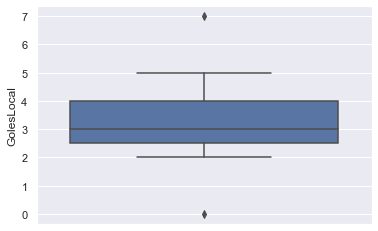

In [90]:
sns.boxplot(y=Madrid_Tot_2['GolesLocal'])
plt.show()

In [64]:
Madrid_Tot_2['GolesVisitante'].describe()

count    19.000000
mean      2.157895
std       1.424514
min       0.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       5.000000
Name: GolesVisitante, dtype: float64

In [82]:
Madrid_Tot_2['GolesVisitante'].sum()

41.0

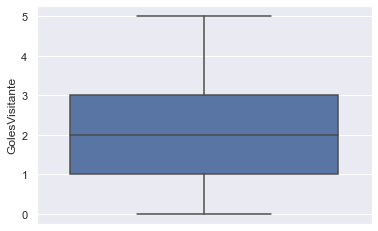

In [87]:
sns.boxplot(y=Madrid_Tot_2['GolesVisitante'])
plt.show()

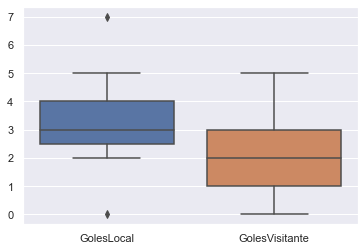

In [88]:
sns.boxplot(data=Madrid_Tot_2.loc[:, ['GolesLocal', 'GolesVisitante']])
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


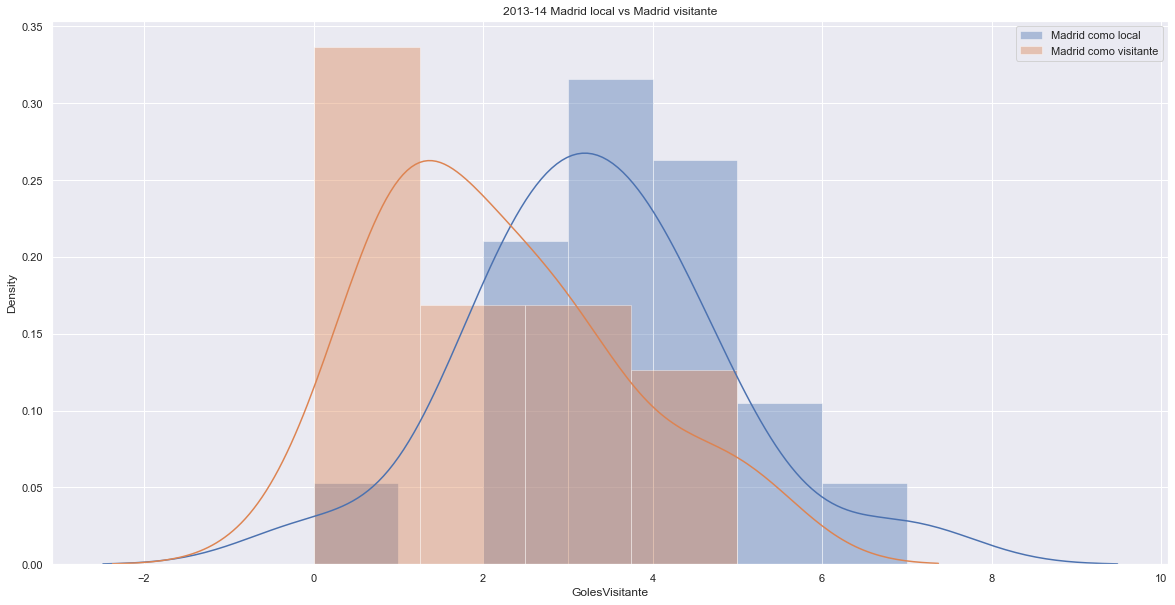

In [65]:
plt.figure(figsize = (20,10))
sns.distplot(Madrid_Tot_2['GolesLocal'], label='Madrid como local')
sns.distplot(Madrid_Tot_2['GolesVisitante'], label='Madrid como visitante')
plt.title("2013-14 Madrid local vs Madrid visitante")
plt.legend()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


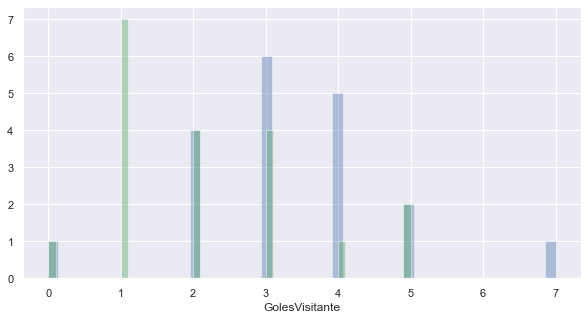

In [66]:
plt.figure(figsize=(10,5))
sns.distplot(Madrid_Tot_2['GolesLocal'],
             kde=False,
             color='b',
             bins=50);
sns.distplot(Madrid_Tot_2['GolesVisitante'],
             kde=False,
             color='g',
             bins=50);

In [67]:
BarsaL_2 = df_laliga_2013y14.loc[df_laliga_2013y14['Team 1'] == 'FC Barcelona', ['GolesLocal']]
BarsaL_2.reset_index(inplace=True)
BarsaL_2

,index,GolesLocal
0,5,7.0
1,33,3.0
2,53,4.0
3,73,4.0
4,93,2.0
5,110,1.0
6,133,4.0
7,152,2.0
8,174,4.0
9,206,3.0


In [68]:
BarsaV_2 = df_laliga_2013y14.loc[df_laliga_2013y14['Team 2'] == 'FC Barcelona', ['GolesVisitante']]
BarsaV_2.reset_index(inplace=True)
BarsaV_2

,index,GolesVisitante
0,17,1.0
1,28,3.0
2,41,4.0
3,63,2.0
4,80,0.0
5,101,3.0
6,126,4.0
7,147,0.0
8,165,5.0
9,182,0.0


In [69]:
BarsaTot_2=pd.merge(BarsaL_2, BarsaV_2, left_index=True, right_index=True)
BarsaTot_2

,index_x,GolesLocal,index_y,GolesVisitante
0,5,7.0,17,1.0
1,33,3.0,28,3.0
2,53,4.0,41,4.0
3,73,4.0,63,2.0
4,93,2.0,80,0.0
5,110,1.0,101,3.0
6,133,4.0,126,4.0
7,152,2.0,147,0.0
8,174,4.0,165,5.0
9,206,3.0,182,0.0


In [70]:
BarsaTot_2['GolesTotales']=BarsaTot_2['GolesLocal']+BarsaTot_2['GolesVisitante']

BarsaTot_2

,index_x,GolesLocal,index_y,GolesVisitante,GolesTotales
0,5,7.0,17,1.0,8.0
1,33,3.0,28,3.0,6.0
2,53,4.0,41,4.0,8.0
3,73,4.0,63,2.0,6.0
4,93,2.0,80,0.0,2.0
5,110,1.0,101,3.0,4.0
6,133,4.0,126,4.0,8.0
7,152,2.0,147,0.0,2.0
8,174,4.0,165,5.0,9.0
9,206,3.0,182,0.0,3.0


In [71]:
BarsaTot_2['GolesVisitante'].describe()

count    19.000000
mean      1.894737
std       1.760516
min       0.000000
25%       0.000000
50%       1.000000
75%       3.500000
max       5.000000
Name: GolesVisitante, dtype: float64

In [80]:
BarsaTot_2['GolesVisitante'].sum()

36.0

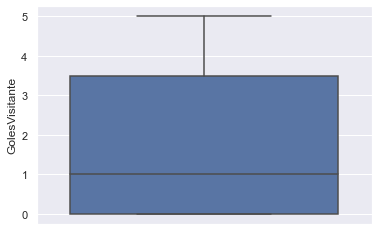

In [91]:
sns.boxplot(y=BarsaTot_2['GolesVisitante'])
plt.show()

In [72]:
BarsaTot_2['GolesLocal'].describe()

count    19.000000
mean      3.368421
std       1.770453
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       7.000000
Name: GolesLocal, dtype: float64

In [81]:
BarsaTot_2['GolesLocal'].sum()

64.0

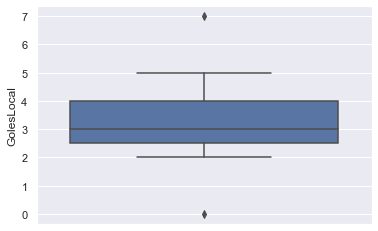

In [92]:
sns.boxplot(y=Madrid_Tot_2['GolesLocal'])
plt.show()

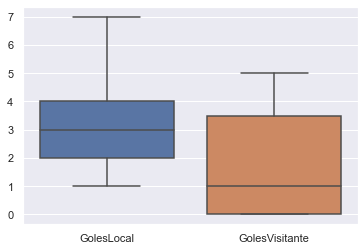

In [93]:
sns.boxplot(data=BarsaTot_2.loc[:, ['GolesLocal', 'GolesVisitante']])
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


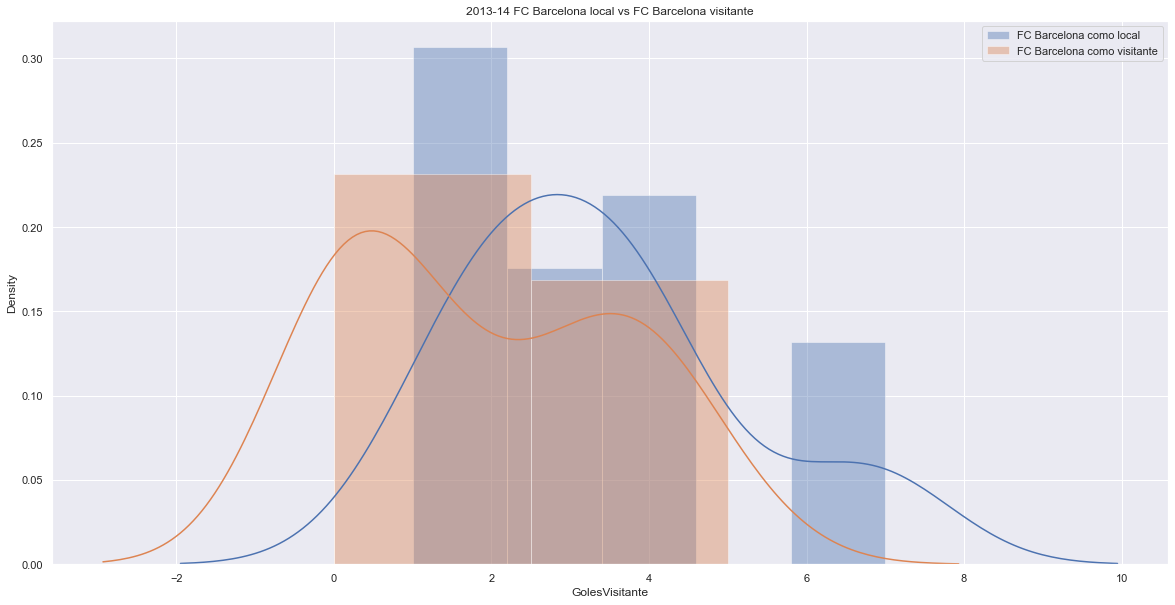

In [73]:
plt.figure(figsize = (20,10))
sns.distplot(BarsaTot_2['GolesLocal'], label='FC Barcelona como local')
sns.distplot(BarsaTot_2['GolesVisitante'], label='FC Barcelona como visitante')
plt.title("2013-14 FC Barcelona local vs FC Barcelona visitante")
plt.legend()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


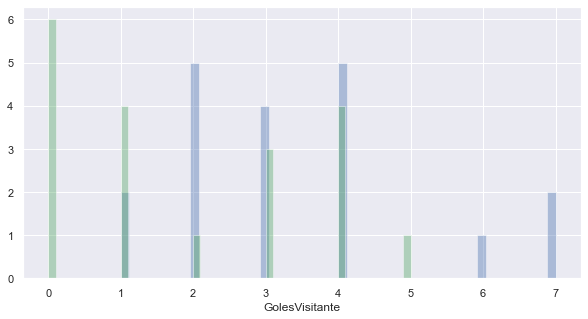

In [74]:
plt.figure(figsize=(10,5))
sns.distplot(BarsaTot_2['GolesLocal'],
             kde=False,
             color='b',
             bins=50);
sns.distplot(BarsaTot_2['GolesVisitante'],
             kde=False,
             color='g',
             bins=50);

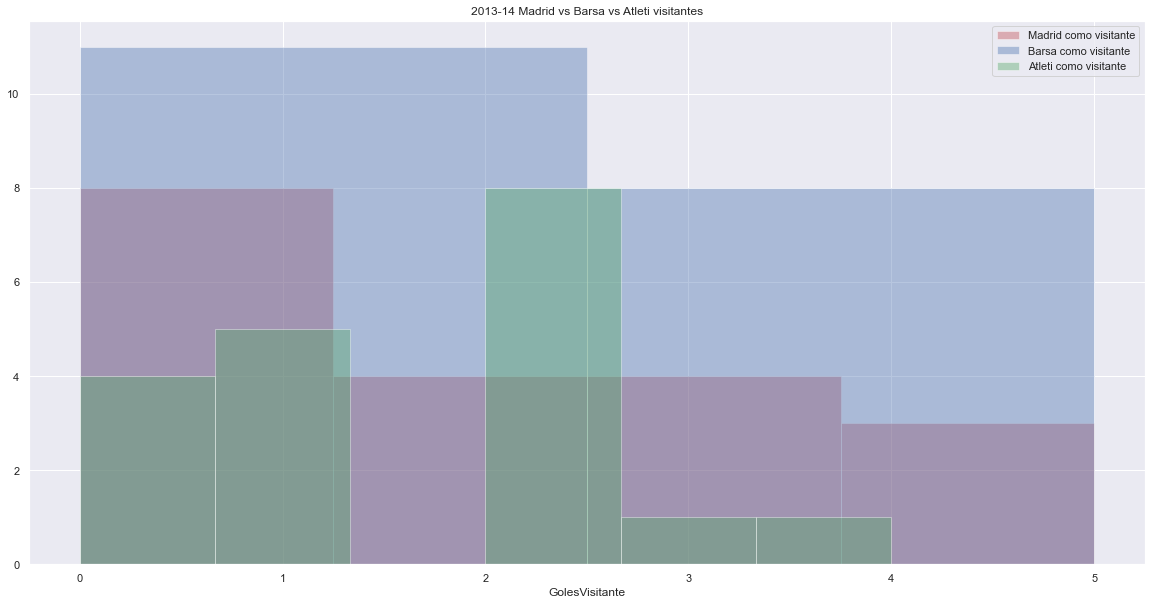

In [122]:
plt.figure(figsize = (20,10))
sns.distplot(Madrid_Tot_2['GolesVisitante'],kde=False,color='r', label='Madrid como visitante')
sns.distplot(BarsaTot_2['GolesVisitante'],kde=False,color='b', label='Barsa como visitante')
sns.distplot(Atleti_Tot_1['GolesVisitante'],kde=False,color='g', label='Atleti como visitante')
plt.title("2013-14 Madrid vs Barsa vs Atleti visitantes")
plt.legend()

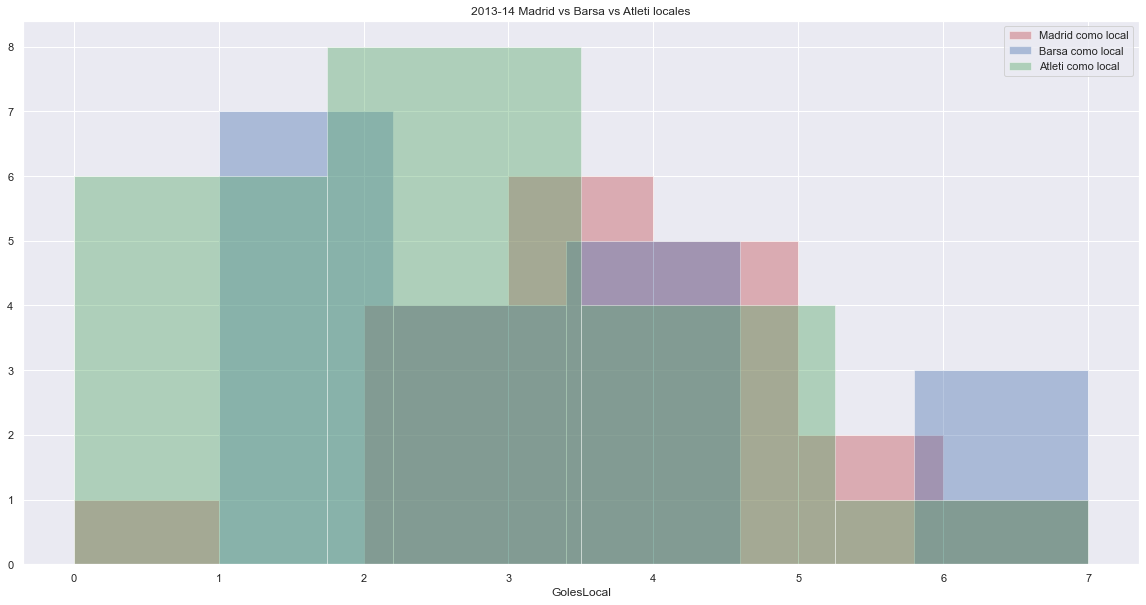

In [123]:
plt.figure(figsize = (20,10))
sns.distplot(Madrid_Tot_2['GolesLocal'],kde=False,color='r', label='Madrid como local')
sns.distplot(BarsaTot_2['GolesLocal'],kde=False,color='b', label='Barsa como local')
sns.distplot(Atleti_Tot_1['GolesLocal'],kde=False,color='g', label='Atleti como local')
plt.title("2013-14 Madrid vs Barsa vs Atleti locales")
plt.legend()

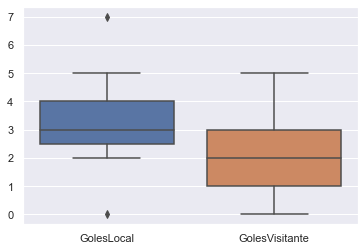

In [130]:
sns.boxplot(data=Madrid_Tot_2.loc[:, ['GolesLocal', 'GolesVisitante']])
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


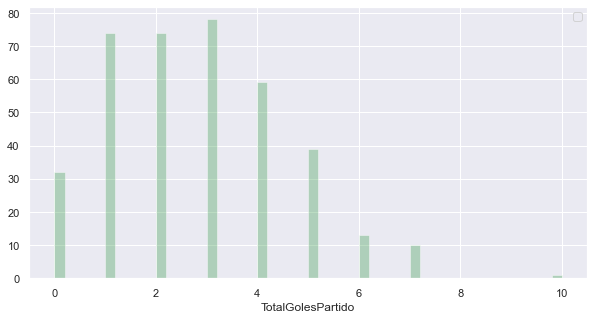

In [125]:
plt.figure(figsize=(10,5))
sns.distplot(df_laliga_2013y14['TotalGolesPartido'],
             kde=False,
             color='g',
             bins=50);


Distribución de goles temporada 2013-14

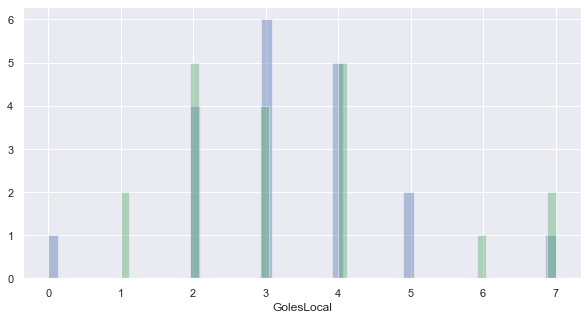

In [127]:
plt.figure(figsize=(10,5))
sns.distplot(Madrid_Tot_2['GolesLocal'],
             kde=False,
             color='b',
             bins=50);
sns.distplot(BarsaTot_2['GolesLocal'],
             kde=False,
             color='g',
             bins=50);


Madrid vs Barsa 2013-14 como locales

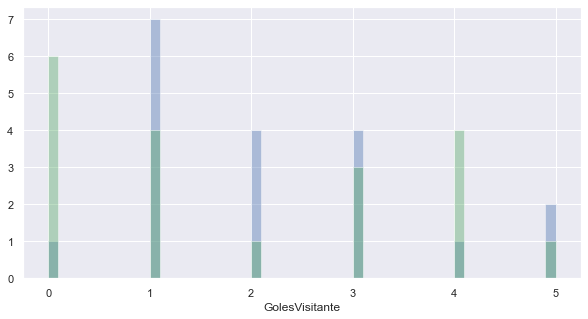

In [79]:
plt.figure(figsize=(10,5))
sns.distplot(Madrid_Tot_2['GolesVisitante'],
             kde=False,
             color='b',
             bins=50);
sns.distplot(BarsaTot_2['GolesVisitante'],
             kde=False,
             color='g',
             bins=50);

Madrid vs Barsa como Visitantes 2013-14

In [94]:
df_laliga_2013y14

,Round,Date,Team 1,FT,Team 2,GolesLocal,GolesVisitante,TotalGolesPartido
0,1,Sat Aug 17 2013,Real Sociedad,2-0,Getafe CF,2.0,0.0,2.0
1,1,Sat Aug 17 2013,Real Valladolid CF,1-2,Athletic Club Bilbao,1.0,2.0,3.0
2,1,Sat Aug 17 2013,Valencia CF,1-0,Málaga CF,1.0,0.0,1.0
3,1,Sun Aug 18 2013,Sevilla FC,1-3,Atlético Madrid,1.0,3.0,4.0
4,1,Sun Aug 18 2013,CA Osasuna,1-2,Granada CF,1.0,2.0,3.0
...,...,...,...,...,...,...,...,...
375,38,Sun May 18 2014,UD Almería,0-0,Athletic Club Bilbao,0.0,0.0,0.0
376,38,Sun May 18 2014,Real Valladolid CF,0-1,Granada CF,0.0,1.0,1.0
377,38,Sun May 18 2014,Rayo Vallecano,1-2,Getafe CF,1.0,2.0,3.0
378,38,Sun May 18 2014,Sevilla FC,3-1,Elche CF,3.0,1.0,4.0


<AxesSubplot:xlabel='Team 1', ylabel='GolesLocal'>

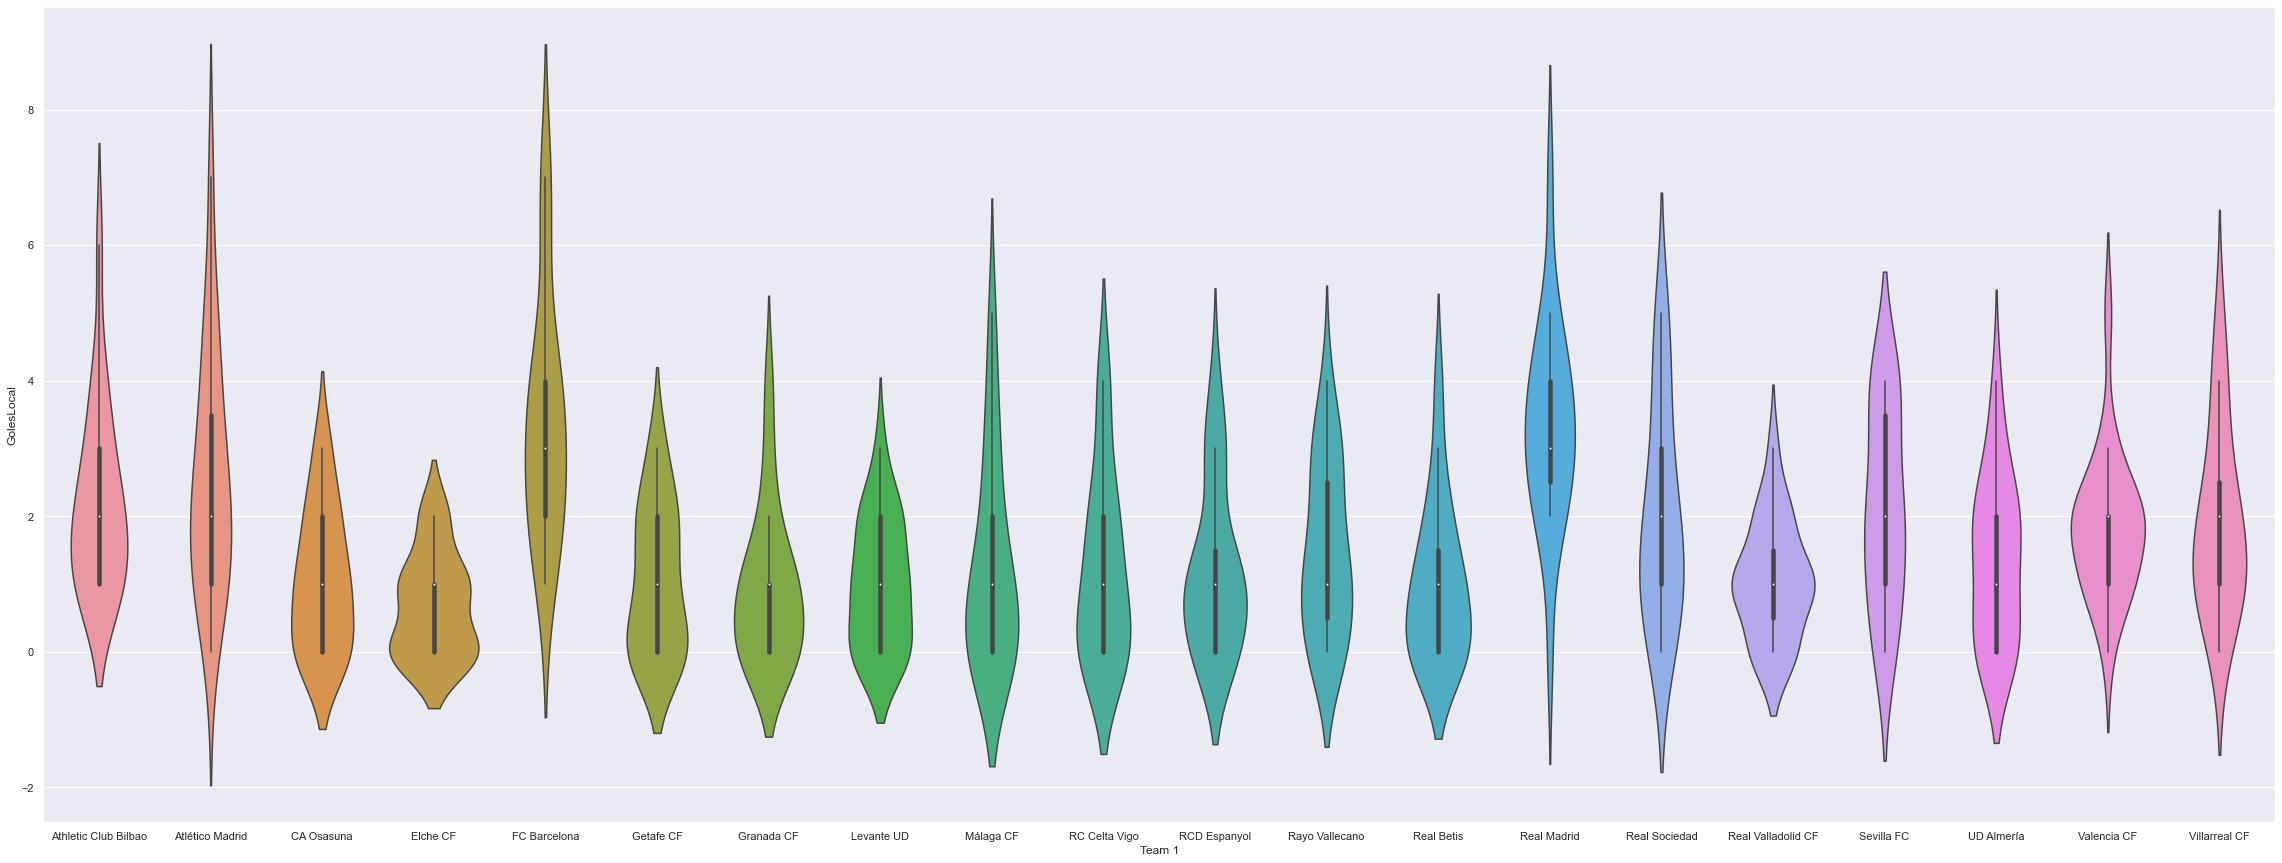

In [128]:
plt.figure(figsize=(40,15))
sns.violinplot(x=df_laliga_2013y14['Team 1'].sort_values(), y=df_laliga_2013y14['GolesLocal'])

Equipos de la liga y sus goles como locales.

<AxesSubplot:xlabel='Team 2', ylabel='GolesVisitante'>

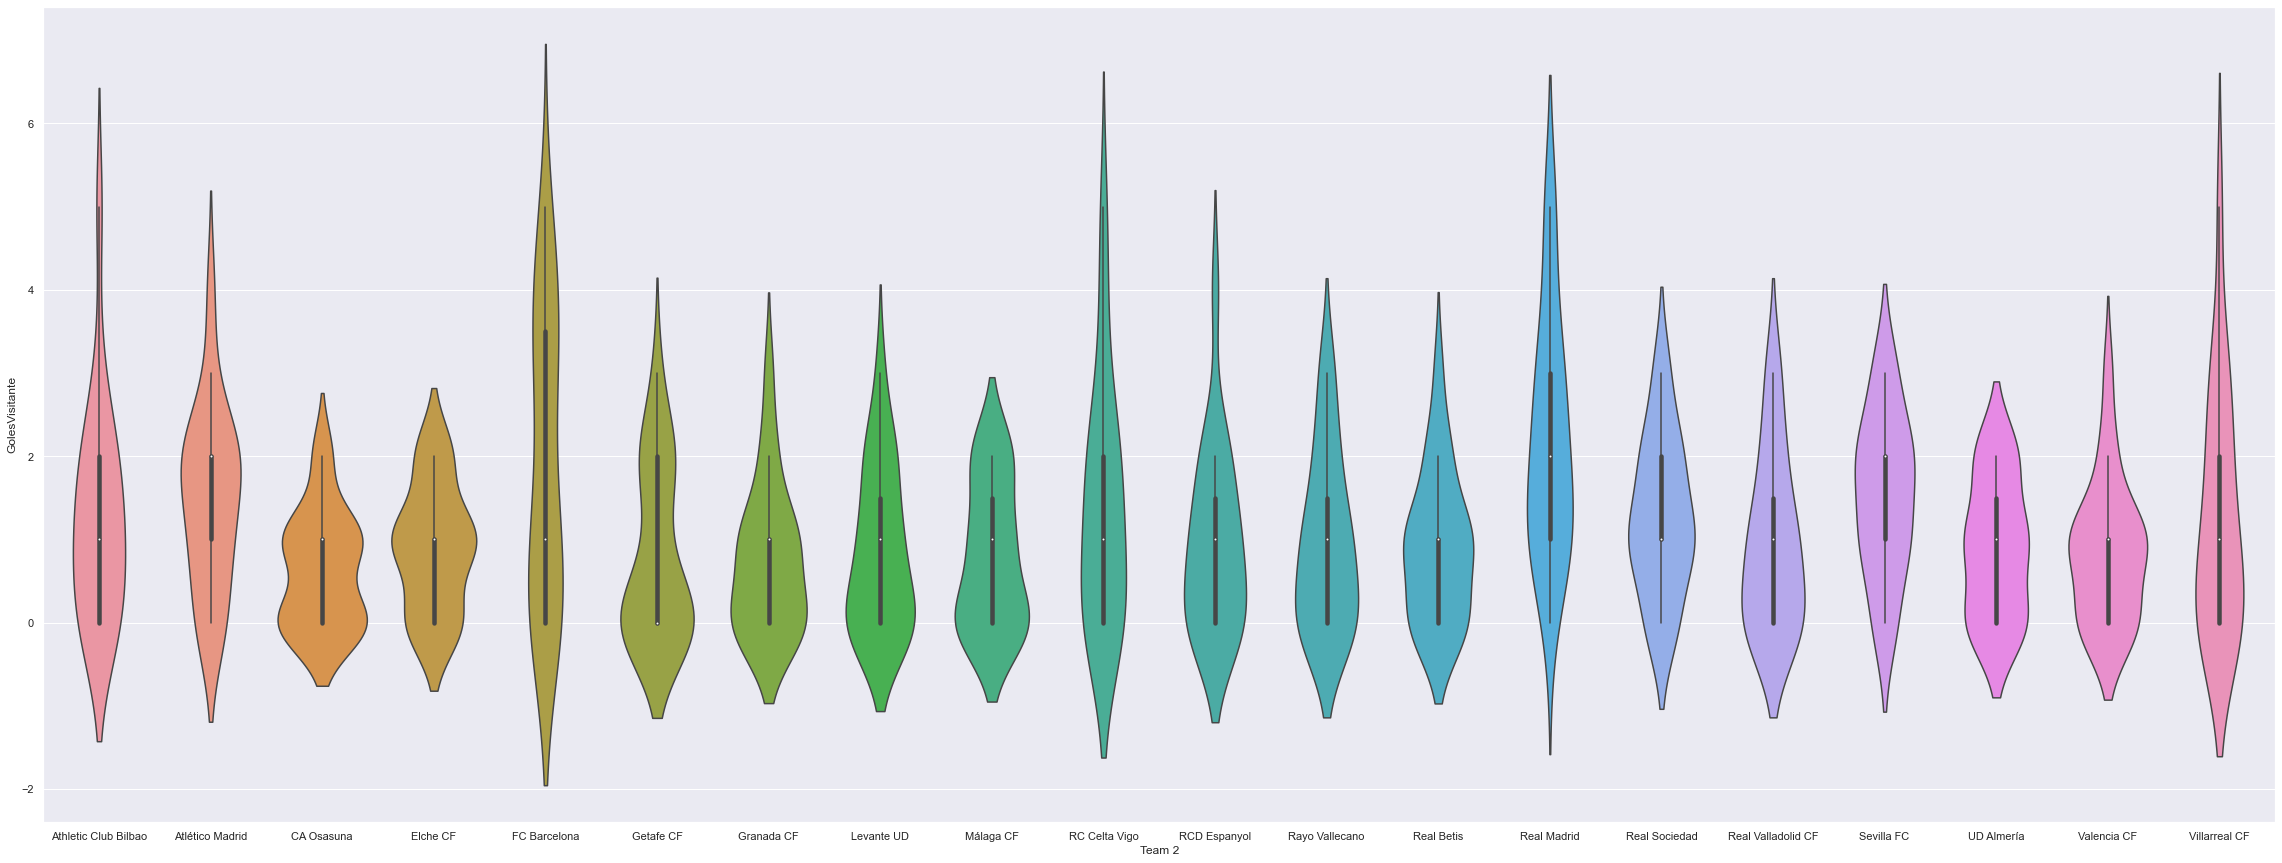

In [129]:
plt.figure(figsize=(40,15))
sns.violinplot(x=df_laliga_2013y14['Team 2'].sort_values(), y=df_laliga_2013y14['GolesVisitante'])

Equipos de la liga y sus goles como visitantes

Ganador del campeonato: Atlético de Madrid

In [131]:
Madrid_Tot_2['GolesTotales'].sum()

104.0

In [132]:
BarsaTot_2['GolesTotales'].sum()

100.0